<a href="https://colab.research.google.com/github/sruthi1014/Image-Classification/blob/master/Digit%20Recogniser/digit_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install numpy

In [ ]:
pip install tensorflow


In [2]:
pip install keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import tensorflow as tf
import keras as ks


In [4]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#### Loading data

In [24]:
train=pd.read_csv(r"/content/drive/My Drive/Imageclassification/train.csv",encoding="utf8")
test=pd.read_csv(r"/content/drive/My Drive/Imageclassification/test.csv",encoding="utf8")

In [25]:
train.shape

(42000, 785)

In [9]:
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Reshaping the data to print images

In [28]:
z = np.empty(10, dtype=object) 
def imagePrint(digit):
    x=train[train.label == digit]
    y=x.head(1).values[-1,1:]
    z[digit]=y.reshape(28,28)
    
 

#### Printing Images

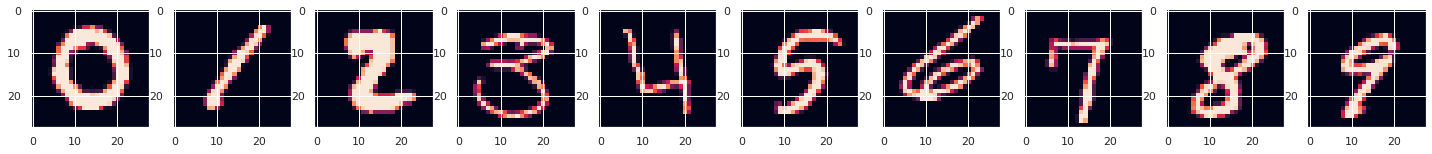

In [29]:
digits=[0,1,2,3,4,5,6,7,8,9]
for q in digits: 
   imagePrint(q)

fig = plt.figure(figsize=(25, 14))
#plotting the images for each digit
for i in range(len(z)):
  fig.add_subplot(1,10,i+1)
  plt.imshow(z[i])
 

#### Distribution of the labels

In [30]:
distribution=pd.DataFrame(train.label.value_counts())
distribution.columns = ['count']
distribution.insert(0,"label",distribution.index.values)
distribution.sort_values("label")

,label,count
0,0,4132
1,1,4684
2,2,4177
3,3,4351
4,4,4072
5,5,3795
6,6,4137
7,7,4401
8,8,4063
9,9,4188


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


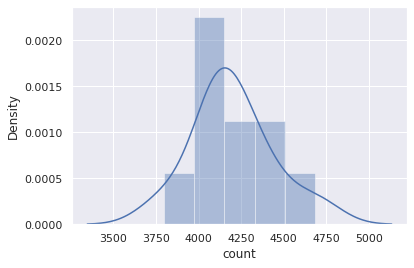

In [31]:
sns.set(color_codes=True)
sns.distplot(distribution["count"]);
#the labels are distributed almost uniformly and so we can consider as a balanced data.

In [32]:
train.iloc[0:,[-2]]

,pixel782
0,0
1,0
2,0
3,0
4,0
...,...
41995,0
41996,0
41997,0
41998,0


#### LOGISTIC REGRESSION

In [33]:
c=[0.1,0.15,0.25,0.01,0.5,1,10] #varying costs to find the better performance. tested it on test data and the 
                                 #results are given in pdf.
for i in range(len(c)):
  model = LogisticRegression(C=c[i-1], penalty='l1', solver='saga',tol=0.1)
  model.fit(train.iloc[1:,1:], train.iloc[1:,0])
  sparsity = np.mean(model.coef_ == 0) * 100
  test_pred = model.predict(test.iloc[1:,:])
  pd.DataFrame(test_pred).to_csv('predicted_5_l1_'+str(c[i])+'.csv', index=False) 

In [34]:
pd.DataFrame(test_pred).describe()

,0
count,27999.000000
mean,4.447266
std,2.902590
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


#### Neural Net Classifier

In [35]:
# save input image dimensions
img_rows, img_cols = 28, 28
x_train=train.iloc[:,1:].copy()
y_train=train.iloc[:,0].copy().values
x_test=test.iloc[1:,:].copy()
x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)



In [36]:
#splitting the train data into train and validation
import random
random.seed(0)
split_size = int(x_train.shape[0]*0.7)
train_x,val_x = x_train[:split_size],x_train[split_size:]
train_y,val_y = y_train[:split_size],y_train[split_size:]

train_x = train_x.reshape (train_x.shape[0], img_rows, img_cols,1)
val_x = val_x.reshape (val_x.shape[0], img_rows, img_cols,1)

In [37]:
x_train.shape

(42000, 28, 28, 1)

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(200,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(10,activation='softmax'))

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [40]:
model.fit(train_x, train_y,
          epochs=10,
         verbose=1, validation_data = (val_x,val_y))
#y_test=pd.DataFrame(model.predict_classes(x_test))

Epoch 1/10
919/919 [==============================] - 22s 24ms/step - loss: 1.8304 - accuracy: 0.5536 - val_loss: 0.5092 - val_accuracy: 0.8576
Epoch 2/10
919/919 [==============================] - 23s 25ms/step - loss: 0.5883 - accuracy: 0.8350 - val_loss: 0.2521 - val_accuracy: 0.9354
Epoch 3/10
919/919 [==============================] - 22s 24ms/step - loss: 0.3474 - accuracy: 0.9028 - val_loss: 0.1816 - val_accuracy: 0.9480
Epoch 4/10
919/919 [==============================] - 22s 24ms/step - loss: 0.2543 - accuracy: 0.9291 - val_loss: 0.1487 - val_accuracy: 0.9633
Epoch 5/10
919/919 [==============================] - 22s 24ms/step - loss: 0.2174 - accuracy: 0.9404 - val_loss: 0.1414 - val_accuracy: 0.9647
Epoch 6/10
919/919 [==============================] - 26s 28ms/step - loss: 0.2050 - accuracy: 0.9439 - val_loss: 0.1629 - val_accuracy: 0.9575
Epoch 7/10
919/919 [==============================] - 22s 24ms/step - loss: 0.1732 - accuracy: 0.9544 - val_loss: 0.1348 - val_accuracy:

In [41]:
y_test=pd.DataFrame(model.predict_classes(x_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
y_test.to_csv('/content/drive/My Drive/Imageclassification/output_cnn.csv', index=False)

In [ ]:
##predicting the values of the validating data to get confusion matrix

In [44]:
predictions = model.predict_classes(val_x)

#### Confusion Matrix

In [45]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
cm = metrics.confusion_matrix(val_y, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [46]:
cm

array([[1251,    0,    3,    1,    0,    0,    1,    1,    5,    1],
       [   0, 1399,    2,    1,    1,    1,    0,    0,    5,    1],
       [   3,    3, 1173,   10,    2,    0,    2,   14,   17,    2],
       [   0,    2,    7, 1266,    0,   18,    0,    9,   13,    2],
       [   1,    5,    5,    0, 1148,    0,    2,    4,    6,   13],
       [   3,    2,    1,   11,    1, 1098,    1,    0,   14,    4],
       [  31,    2,    5,    0,    3,   11, 1162,    0,   13,    0],
       [   0,    5,    6,    0,    0,    0,    0, 1307,    2,   12],
       [   3,   29,    6,    3,    2,   19,    1,    2, 1167,    3],
       [   4,    2,    2,    4,   15,    6,    0,   41,   10, 1188]])

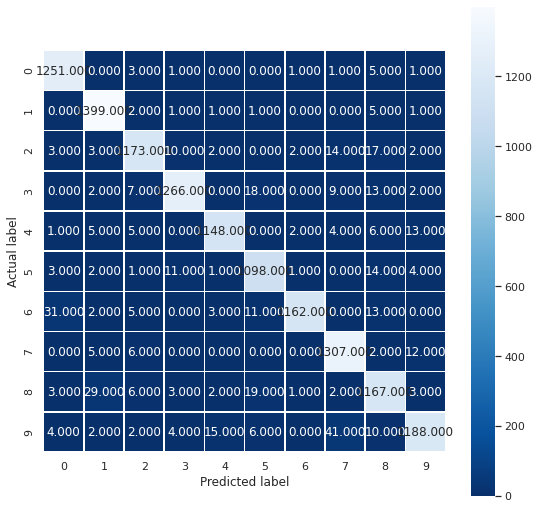

In [47]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [48]:
##classification report
report=pd.DataFrame(classification_report(val_y,predictions,output_dict=True)).transpose()
report.insert(0,"label",report.index.values)

In [49]:
report

,label,precision,recall,f1-score,support
0,0,0.965278,0.990499,0.977726,1263.000000
1,1,0.965493,0.992199,0.978664,1410.000000
2,2,0.969421,0.956770,0.963054,1226.000000
3,3,0.976852,0.961276,0.969001,1317.000000
4,4,0.979522,0.969595,0.974533,1184.000000
5,5,0.952298,0.967401,0.959790,1135.000000
6,6,0.994012,0.947025,0.969950,1227.000000
7,7,0.948476,0.981231,0.964576,1332.000000
8,8,0.932109,0.944939,0.938480,1235.000000
9,9,0.969005,0.933962,0.951161,1272.000000


In [50]:
# label with lowest precision
min_index=report[report.precision == report.precision.min()]
min_index
## Label 5 has the lowest precision

,label,precision,recall,f1-score,support
8,8,0.932109,0.944939,0.93848,1235.0


## Displaying misclassified images

In [51]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(val_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

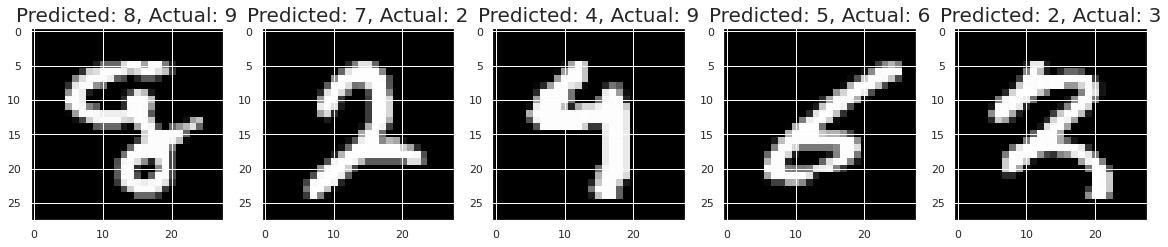

In [52]:
# printing misclassified images
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(val_x[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], val_y[badIndex]), fontsize = 20)